In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv("./../data/wine.data", header=None)
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [19]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_train_std)

In [20]:
cov_matrix = np.cov(X_train_std.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print(f"Eigenvalues:\n ", eigen_values)

Eigenvalues:
  [4.68272277 2.5174937  1.44251124 0.95025687 0.91388156 0.70002767
 0.59696802 0.09544816 0.14241154 0.31659155 0.22087117 0.26741076
 0.25909606]


In [21]:
total_sum_eig_vals = sum(eigen_values)
var_explained = [(i/total_sum_eig_vals) for i in sorted(eigen_values, reverse=True)]
cum_var_explained = np.cumsum(var_explained)

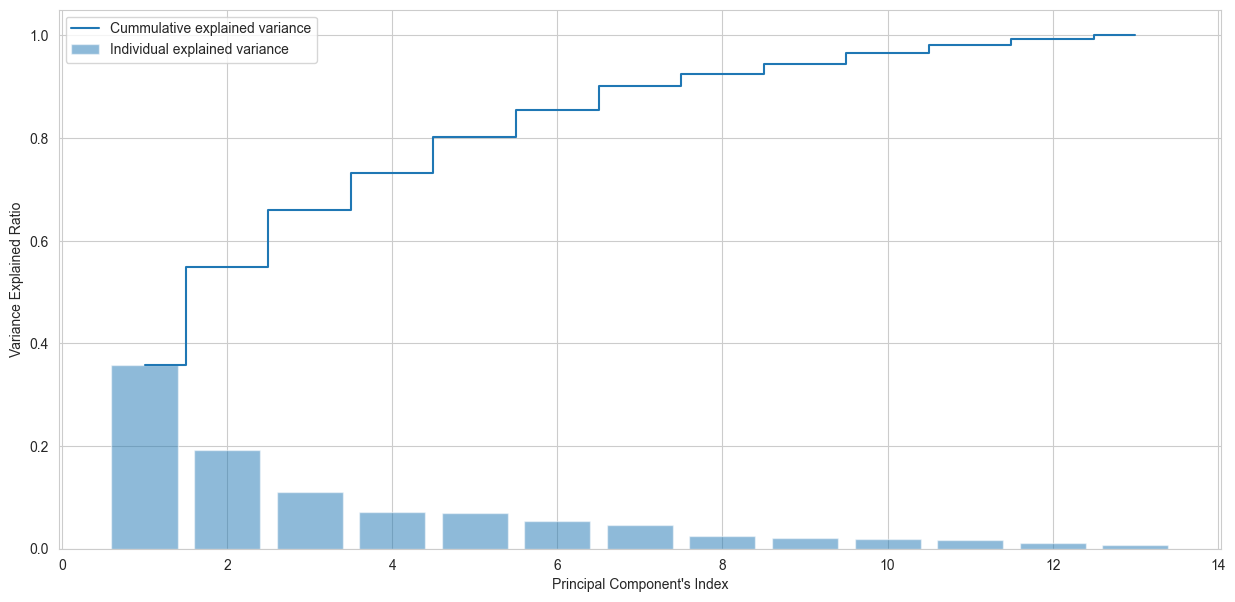

In [22]:
plt.figure(figsize=(15, 7))
plt.bar(range(1,14), var_explained, alpha=0.5, align='center', label = 'Individual explained variance')
plt.step(range(1,14), cum_var_explained, where='mid', label = 'Cummulative explained variance')
plt.ylabel("Variance Explained Ratio")
plt.xlabel("Principal Component's Index")
plt.legend(loc='best')
plt.show();

In [23]:
# создаем список кортежей (собственное значение, собсвенный вектор)
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
# сортируем кортежи
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [24]:
eigen_pairs

[(4.682722770473001,
  array([ 0.15763477, -0.25237011, -0.01662626, -0.23514225,  0.14285062,
          0.38989121,  0.42596901, -0.28675917,  0.30864294, -0.08886736,
          0.30119689,  0.37783572,  0.28836287])),
 (2.5174937008935845,
  array([-0.49414675, -0.1670862 , -0.33581955,  0.0230456 , -0.2816766 ,
         -0.07164769, -0.00569565, -0.04855187, -0.00589032, -0.52633004,
          0.28399523,  0.18136641, -0.3703045 ])),
 (1.4425112439605507,
  array([-0.13550025,  0.08484512,  0.61436922,  0.62199483,  0.08744449,
          0.18025489,  0.1288233 ,  0.22290079,  0.16925303, -0.15886766,
          0.14029634,  0.13133987, -0.11347494])),
 (0.9502568705615343,
  array([ 0.22002101, -0.34863385,  0.21029079, -0.11850515, -0.54616385,
          0.01134185,  0.01728643,  0.43279572, -0.38816555,  0.05280192,
          0.29582335,  0.05170014,  0.20518301])),
 (0.9138815593826505,
  array([ 0.1001375 ,  0.51191077, -0.10967198, -0.01880619, -0.60714326,
          0.28882326,

In [25]:
# формируем матрицу W
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print("Матрица трансформации: \n", W)

Матрица трансформации: 
 [[ 0.15763477 -0.49414675]
 [-0.25237011 -0.1670862 ]
 [-0.01662626 -0.33581955]
 [-0.23514225  0.0230456 ]
 [ 0.14285062 -0.2816766 ]
 [ 0.38989121 -0.07164769]
 [ 0.42596901 -0.00569565]
 [-0.28675917 -0.04855187]
 [ 0.30864294 -0.00589032]
 [-0.08886736 -0.52633004]
 [ 0.30119689  0.28399523]
 [ 0.37783572  0.18136641]
 [ 0.28836287 -0.3703045 ]]


In [26]:
X_train_pca = X_train_std.dot(W)

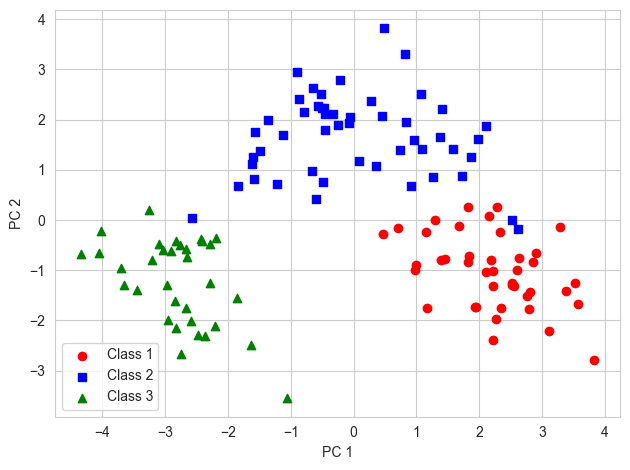

In [27]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis